In [31]:
import sys
sys.path.append('..')
from logger import load_bundle
from matplotlib.pyplot import *
from numpy import pi

In [32]:
cascade_pid = load_bundle('../Diploma Thesis/benchmark_cascadepid_original_constants.hc3')
gainsched = load_bundle('../Diploma Thesis/benchmark_gainsched_original_constants.hc3')

In [33]:
ke = 60 * 10
deg = pi / 180

ts = cascade_pid.ts[:ke]

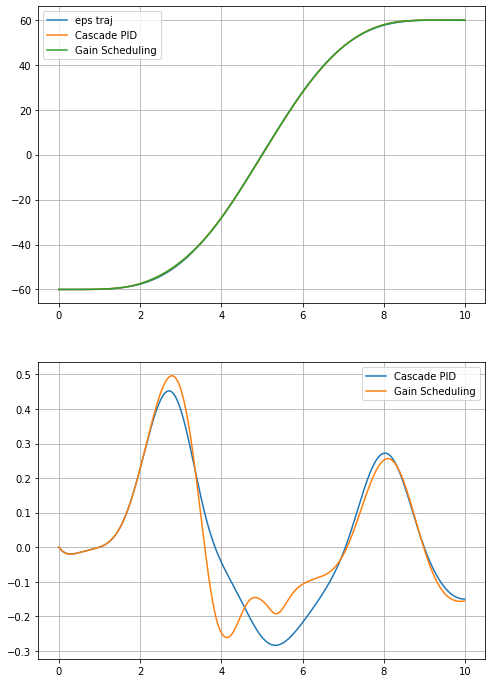

In [34]:
figure(figsize=(8, 12))
subplot(211)
plot(ts, cascade_pid.eps_ds[:ke, 0]/deg, label="eps traj")
plot(ts, cascade_pid.xs[:ke, 1]/deg, label="Cascade PID")
plot(ts, gainsched.xs[:ke, 1]/deg, label="Gain Scheduling")
legend()
grid()
subplot(212)
plot(ts, (cascade_pid.xs[:ke, 1] - cascade_pid.eps_ds[:ke, 0])/deg, label="Cascade PID")
plot(ts, (gainsched.xs[:ke, 1] - cascade_pid.eps_ds[:ke, 0])/deg, label="Gain Scheduling")
legend()
grid()

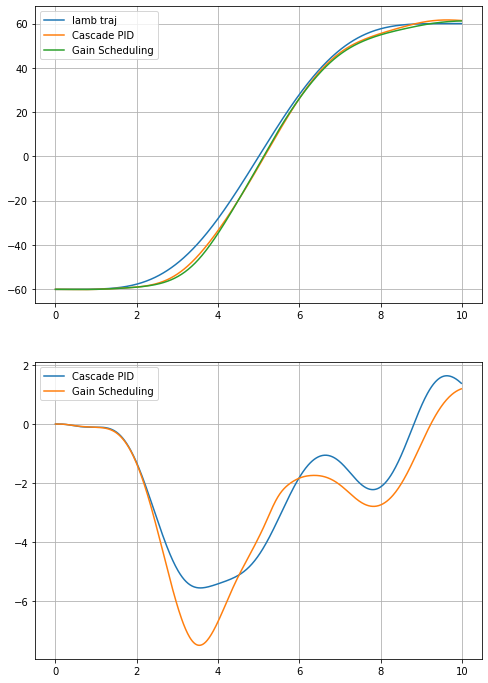

In [35]:
figure(figsize=(8, 12))
subplot(211)
plot(ts, cascade_pid.lamb_ds[:ke, 0]/deg, label="lamb traj")
plot(ts, cascade_pid.xs[:ke, 2]/deg, label="Cascade PID")
plot(ts, gainsched.xs[:ke, 2]/deg, label="Gain Scheduling")
legend()
grid()
subplot(212)
plot(ts, (cascade_pid.xs[:ke, 2] - cascade_pid.lamb_ds[:ke, 0])/deg, label="Cascade PID")
plot(ts, (gainsched.xs[:ke, 2] - cascade_pid.lamb_ds[:ke, 0])/deg, label="Gain Scheduling")
legend()
grid()